In [1]:
from scigraph.datatables import XYTable


values = [
    [0,  45, 34, None, 34, 31, 29  ],
    [6,  56, 58, 61,   41, 43, 42  ],
    [12, 76, 72, 77,   52, 55, 55  ],
    [24, 81, 95, 83,   63, 63, None],
    [48, 99, 100, 104, 72, 67, 81  ],
    [72, 97, 110, 115, 78, 87, None],
]

table = XYTable(
    values,
    n_x_replicates=1,
    n_y_replicates=3,
    n_datasets=2,
    dataset_names=["Control", "Treated"]
)

table.x_title = "Hours"
table.y_title = "Response, %"
table

  Hours Control               Treated            
      1       1      2      3       1     2     3
0   0.0    45.0   34.0    NaN    34.0  31.0  29.0
1   6.0    56.0   58.0   61.0    41.0  43.0  42.0
2  12.0    76.0   72.0   77.0    52.0  55.0  55.0
3  24.0    81.0   95.0   83.0    63.0  63.0   NaN
4  48.0    99.0  100.0  104.0    72.0  67.0  81.0
5  72.0    97.0  110.0  115.0    78.0  87.0   NaN

In [2]:
from scigraph.analyses.curvefit import ExponentialDecay

cf = ExponentialDecay(table)
cf.analyze()

/Users/leonardlee/Projects/scigraph/scigraph/analyses/curvefit/_curvefit.py:370: RuntimeWarning: overflow encountered in exp
  return c + (y0 - c) * np.exp(-k * x)


Control     Treated
Best Fit Params y0     40.440467   31.711820
                c     107.372119   82.708865
                k       0.053089    0.041156
CI 95%          y0      7.538266    4.531132
                c       7.276800    7.931243
                k       0.019291    0.017696
Goodness of Fit dof    14.000000   13.000000
                r2      0.949729    0.957781
                rss   444.221600  210.693407
                sy_x    5.632949    4.025815
                n      17.000000   16.000000

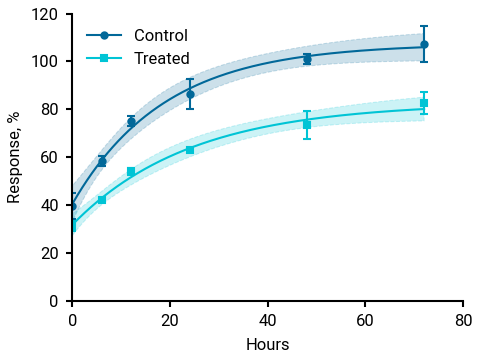

In [3]:
graph = table.create_xy_graph() \
    .add_points("mean") \
    .add_errorbars("sd") \
    .link_analysis(cf, bands="confidence")

ax = graph.draw()
ax.set_xlim(0, 80)
ax.set_ylim(0, 120);